## Introduction to Python tools
+ numpy
+ scipy
+ matplotlib


August 2019
Marty Ligare

#### Importing modules

I'm being explicit with my import statements.  An easier, but sloppier, way would be, e.g., 

    from numpy import *

Then, no `np` prefix would be needed for numpy functions.  (Not recommended.)

For `scipy` it's recommended only to input necessary sub-modules, i.e.,

    from scipy import optimize

In [27]:
import numpy  as np

import matplotlib.pyplot as plt
# ML finds plots too big, thus the customizations:
#plt.rcParams['figure.figsize'] = (6,4.5) # Change default size of plots
#plt.rcParams['font.size'] = 14           # Change default fontsize for figures
#plt.rcParams['figure.autolayout'] = True # Adjusts for changes

# Following "magic" command (not Python) causes figures to be displayed 
# within notebook.  For figures outside the notebook, comment it out, an uncomment
# the line below
%matplotlib notebook
#%matplotlib 

### numpy arrays

Python has several different species of ordered sequences of items, such as lists and arrays.  In these Introduction we will focus on scipy arrays, a data type that is available after importing the scipy module.  (The same kind of arrays are available after importing the numpy module.)  For more about scipy/numpy arrays, see http://www.scipy-lectures.org/intro/numpy/array_object.html

#### making arrays 'by hand'

In [3]:
a = np.array([0,1,4,9,15.9])
b = np.array([[0,1],[1,4],[2,7],[3,10],[4,1]])

In [4]:
a

array([ 0. ,  1. ,  4. ,  9. , 15.9])

In [ ]:
?a

In [5]:
np.sqrt(a)

array([0.        , 1.        , 2.        , 3.        , 3.98748041])

In [6]:
a[0],a[1]

(0.0, 1.0)

In [7]:
a[2:]

array([ 4. ,  9. , 15.9])

In [8]:
b[1]

array([1, 4])

In [9]:
b[1,1],b[1][1]

(4, 4)

#### some 'ready made' arrays

For more such arrays see the Scipy Array Tip Sheet at http://pages.physics.cornell.edu/%7Emyers/teaching/ComputationalMethods/python/arrays.html

In [10]:
c = np.ones(5)
c

array([1., 1., 1., 1., 1.])

In [11]:
d = np.zeros(5)
d

array([0., 0., 0., 0., 0.])

In [12]:
e = np.linspace(0,1,11)
e

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [13]:
f = np.arange(0,10,0.1)
f

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

#### fill an existing array

In [14]:
for i in range(len(d)):
    d[i] = i**3

d

array([ 0.,  1.,  8., 27., 64.])

#### create and fill an array in one step (similar to Mathematica 'Table' function)

In [28]:
g = np.array([i**3 for i in range(5)])
g

array([ 0,  1,  8, 27, 64])

#### read a file into an array / write an array to a file

In [ ]:
h = sp.loadtxt('filename')

In [ ]:
sp.savetxt('filename',h)

#### read the contents of a URL into an array

For simple files `loadtxt()` and `genfromtxt()` used below are pretty equivalent, although `loadtxt()` is simpler and faster.  For more complicated files, `genfromtxt()` provides more flexibility, including the possiblity of reading from remote systems.

In [19]:
k = np.genfromtxt("http://www.eg.bucknell.edu/physics/ph310/hw/hw4-1.dat")

In [18]:
k

array([[14.34584302,  0.31014499],
       [14.34084409,  0.17765324],
       [13.51682503,  0.61953406],
       [14.71693179,  0.12658283],
       [14.0345553 ,  0.4634122 ],
       [14.1016822 ,  0.3466875 ],
       [14.87831111,  0.41390437],
       [14.085719  ,  0.45031151],
       [14.63710135,  0.44658677],
       [14.39090758,  0.5398712 ],
       [14.41117749,  0.69849826],
       [14.28037667,  0.50035189],
       [14.06258172,  0.61155368],
       [14.46253567,  0.61415366],
       [14.32903938,  0.18759991],
       [14.45499461,  0.41534817],
       [14.45254106,  0.10353485],
       [14.49818213,  0.67624977],
       [15.18406411,  0.54377652],
       [15.19346374,  0.71690576]])

In [29]:
m = 2                         # mass
g = 10                        # gravitational field
c = 1                         # drag coefficient
x0 = 50                       # initial height
v0 = 0                        # initial velocity
tf = 4                        # final time
dt = 0.01                     # time step
npt = int(tf/dt)               # Number of points (number of intervals = np - 1)

t = np.linspace(0, tf, npt-1)  # Create array of t-values
y = np.zeros(len(t))          # Create array for values of x
v = np.zeros(len(t))          # Create array for values of v
y[0] = x0                     # Fix initial value of velocity
v[0] = v0                     # Fix initial value of velocity

#### Integrate

In [30]:
for i in range(1,npt-1):        
    y[i] = y[i-1] + v[i-1]*dt               # x_new = x_old + v_old*dt
    v[i] = v[i-1] + f(y[i-1],v[i-1])*dt/m   # v_new = v_old + a_old*dt

TypeError: 'numpy.ndarray' object is not callable

#### Plot

<IPython.core.display.Javascript object>


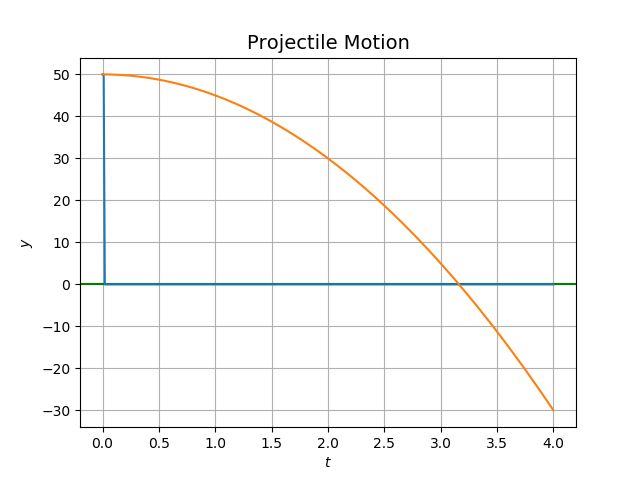

In [31]:
plt.figure(1)
plt.xlabel('$t$')      # Label for horizontal axis
plt.ylabel("$y$")      # Label for vertical axis
plt.title("Projectile Motion",fontsize=14)
plt.grid(True)
plt.axhline(0,color='green')  # Makes solid green x-axis
plt.plot(t,y)
tth = np.linspace(0,tf,201)
xth = 50 - 0.5*g*tth**2
plt.plot(tth,xth);

<IPython.core.display.Javascript object>


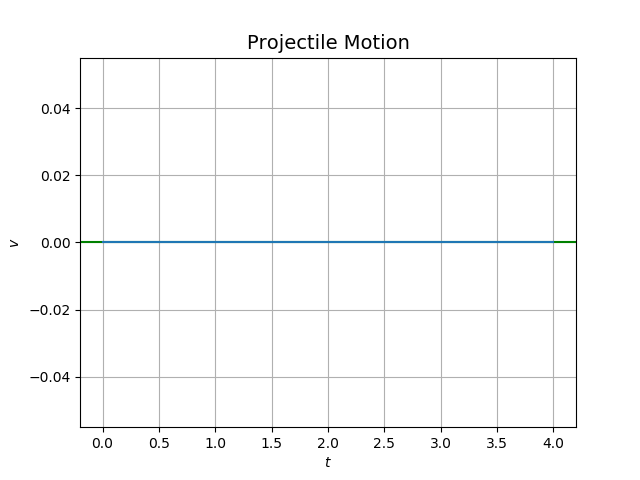

In [32]:
plt.figure(2)
plt.xlabel('$t$')      # Label for horizontal axis
plt.ylabel("$v$")      # Label for vertical axis
plt.title("Projectile Motion",fontsize=14)
plt.grid(True)
plt.axhline(0,color='green')  # Makes solid green x-axis
plt.plot(t,v);

#### Integrate

In [ ]:
for i in range(1,np-1):        
    y[i] = y[i-1] + v[i-1]*dt               # x_new = x_old + v_old*dt
    v[i] = v[i-1] + f(y[i-1],v[i-1])*dt/m   # v_new = v_old + a_old*dt

#### Plot

In [ ]:
m = 2                         # mass
g = 10                        # gravitational field
c = 1                         # drag coefficient
x0 = 50                       # initial height
v0 = 0                        # initial velocity
tf = 4                        # final time
dt = 0.01                     # time step
np = int(tf/dt)               # Number of points (number of intervals = np - 1)

t = sp.linspace(0, tf, np-1)    # Create array of t-values
y = sp.zeros(len(t))          # Create array for values of x
v = sp.zeros(len(t))          # Create array for values of v
y[0] = x0                     # Fix initial value of velocity
v[0] = v0                     # Fix initial value of velocity

In [ ]:
plt.figure(1)
plt.xlabel('$t$')      # Label for horizontal axis
plt.ylabel("$y$")      # Label for vertical axis
plt.title("Projectile Motion",fontsize=14)
plt.grid(True)
plt.axhline(0,color='green')  # Makes solid green x-axis
plt.plot(t,y)
tth = sp.linspace(0,tf,201)
xth = 50 - 0.5*g*tth**2
plt.plot(tth,xth);

In [ ]:
plt.figure(2)
plt.xlabel('$t$')      # Label for horizontal axis
plt.ylabel("$v$")      # Label for vertical axis
plt.title("Projectile Motion",fontsize=14)
plt.grid(True)
plt.axhline(0,color='green')  # Makes solid green x-axis
plt.plot(t,v);

In [ ]:
%matplotlib notebook

In [ ]:
plt.figure()
x = sp.linspace(0,10,5)
y = x**2
plt.plot(x,y);

In [ ]:
dat = sp.array([x,y])
print(dat)

### Coding standards

+ Standards not necessary to make code run; standards do make code more readable.
+ Students look more professional if they use professional standards.

See:
+ PEP 8 -- Style Guide for Python Code | Python.org:
  https://www.python.org/dev/peps/pep-0008/
+  PEP 257 -- Docstring Conventions | Python.org: https://www.python.org/dev/peps/pep-0257/

+ `Imports` should be clear and necessary, and done univformly, without unecessary
   overlap that leads to namespace conflicts
   
+ Indents should be four white spaces, not Tab characters.  (You can acheive this
  with Tab Key with appropriate editor options)

+ Avoid long lines of code (more than 80 characters).  Use `\`'s to break lines.

+ Use a white space after commas, e.g, `linspace(0, 10, 11)`, not `linspace(0,10,11)`

+ Use white space around opertators, e.g, `a = b + 1`, not `a=b+1`


#### Naming conventions

+ Explicit variable names (no need of a comment to explain what is in the variable)
+ name style?  From PEP 8:

  * Function names should be lowercase, with words separated by underscores as necessary to improve readability.
   mixedCase is allowed only in contexts where that's already the prevailing style
  * Variable names: Use the function naming rules: lowercase with words separated by underscores as necessary to improve readability.


#### Commenting functions: Docstrings

def funcname(params):<br>
    """Concise one-line sentence describing the function.<br>

    Extended summary which can contain multiple paragraphs.
    """
    # function body
    pass


funcname?